# METIS Intro to Data Science Project

## By: Ben McGauhey

### Seattle, WA Fall-2017

# Exploratory Data Analysis
We will start by simply loading our dataframe from the pickle file we saved it as earlier, then we will explore some of the relationships between variables and create some visualizations to better understand the data.

In [119]:
import pandas as pd
import numpy as np          # As Always we import our libraries
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point
%matplotlib inline

In [120]:
df = pd.read_pickle('Data/weatherAndCallData.pkl') # Get our dataframe up and running from our saved file

# Let's start by looking at the correlation matrix to see if anything stands out to us

In [121]:
pd.set_option('display.max_columns', 200) # Set our options so we can see more
pd.set_option('display.max_row', 50)

In [122]:
df.corr()

longitude  latitude  homicide   robbery  \
longitude                     1.000000 -0.141098  0.003552  0.013271   
latitude                     -0.141098  1.000000 -0.005796 -0.008627   
homicide                      0.003552 -0.005796  1.000000 -0.000788   
robbery                       0.013271 -0.008627 -0.000788  1.000000   
assault                       0.008909 -0.003687 -0.001770 -0.013167   
burglary                      0.002103  0.029933 -0.001809 -0.013457   
theft                        -0.010674  0.014951 -0.003336 -0.024815   
car_theft                     0.009258  0.001460 -0.001635 -0.012168   
reckless_burning             -0.004282 -0.002544 -0.000138 -0.001023   
fraud                        -0.002130  0.016935 -0.001143 -0.008506   
vice                         -0.003359  0.038281 -0.000441 -0.003280   
property                     -0.000002 -0.003063 -0.001330 -0.009894   
lewd_behavior                 0.007902 -0.006287 -0.000576 -0.004284   
trespass                      0.007147  0.010884 -0.002044 -0.015204   
park_violation               -0.047252 -0.016513 -0.000735 -0.005471   
liquor_violation             -0.000645 -0.063123 -0.002425 -0.018041   
drive_by_shooting             0.023564 -0.021086 -0.000214 -0.001595   
narcotics                    -0.008531 -0.003798 -0.001397 -0.010394   
warrant_service               0.008195 -0.003690 -0.000890 -0.006619   
security_alarms               0.014838 -0.007425 -0.002299 -0.017100   
mental_health                 0.002289  0.005715 -0.001438 -0.010702   
disturbance                  -0.011811  0.008796 -0.004720 -0.035116   
animals                      -0.003683 -0.005314 -0.000538 -0.004002   
suspicious_case              -0.006644  0.030993 -0.004211 -0.031327   
person_with_weapon            0.011751 -0.011426 -0.000525 -0.003903   
...                                ...       ...       ...       ...   
rain_today                   -0.000034 -0.000942 -0.000128  0.001320   
clouds_all                    0.000022  0.002473 -0.000690 -0.000317   
broken_clouds                -0.001338 -0.000084  0.000334 -0.001897   
drizzle                      -0.002314 -0.002180 -0.000076 -0.000566   
few_clouds                   -0.001214 -0.000219  0.001047 -0.001169   
fog                          -0.001156  0.001834  0.000141  0.000118   
haze                          0.000559  0.000770 -0.000443  0.000373   
heavy_intensity_rain          0.001444 -0.001140 -0.000633  0.000165   
heavy_intensity_shower_rain   0.000808 -0.000205 -0.000108 -0.000800   
heavy_snow                   -0.000574 -0.000336 -0.000190  0.003432   
light_intensity_drizzle      -0.000421  0.001085 -0.000886  0.000587   
light_intensity_shower_rain  -0.002326  0.000346  0.000954 -0.000038   
light_rain                   -0.002408  0.001995 -0.000818 -0.000973   
light_snow                    0.000274  0.001608 -0.000497  0.000333   
mist                          0.000036 -0.000525  0.002854  0.002579   
moderate_rain                -0.001875 -0.000362  0.000016  0.000619   
overcast_clouds               0.001894  0.001983 -0.001338 -0.002381   
proximity_thunderstorm        0.001155 -0.001287 -0.000212 -0.000855   
scattered_clouds              0.004563 -0.001034 -0.000759  0.004022   
shower_rain                   0.001589 -0.000487 -0.000105 -0.000779   
sky_is_clear                 -0.001378 -0.002991  0.000623 -0.001232   
smoke                        -0.001096  0.002306 -0.000119 -0.001573   
snow                          0.001220 -0.000879 -0.000210 -0.000097   
thunderstorm                  0.001282 -0.000003 -0.000160 -0.001192   
very_heavy_rain              -0.000060  0.000223 -0.000058 -0.000432   

                              assault  burglary     theft  car_theft  \
longitude                    0.008909  0.002103 -0.010674   0.009258   
latitude                    -0.003687  0.029933  0.014951   0.001460   
homicide                    -0.001770 -0.001809 -0.003336  -0.001635

### Whew! That is way too much to take in at once. Let's break it down by the variables that we really care about seeing against each other.
Since pandas isn't great at creating correlation matrices on specific columns against a list of others, we will simply create a couple lists of what we care about seeing against each other, then loop through them and store the pairwise correlations in a dictionary, then create a dataframe from the key value pairs. It's a bit more work, but works well to give us a correlation matrix of any dimensions we choose.

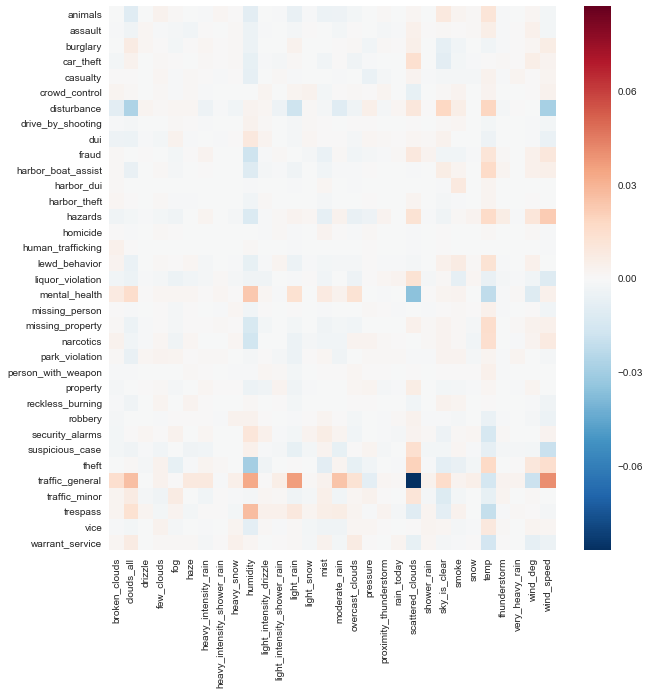

In [123]:
list_1 = df.columns[3:38] # Create a list of the crime columns
list_2 = df.columns[-30:] # Create a list of the weather columns
plotDict = {} # Create our empty dict for the plot

for crime in list_1:
    for weather in list_2:
        tempDict = {(crime, weather): scipy.stats.pearsonr(df[crime],df[weather])} # Create a temp dict with our 
        # Variables in a tuple as the key and their correlation and p value in a tuple as the value
        plotDict.update(tempDict) # Update our plot dict with the temp
        
dfOutputWx = pd.Series(plotDict).unstack() # Create a data frame from the plot dictionary
dfOutputPearsonWx = dfOutputWx.apply(lambda x: x.apply(lambda x:x[0])) # Grab the correlation
fig, ax = plt.subplots() # Separate fig and axes
fig.set_size_inches(10,10) # Make it big enough to see clearly
sns.heatmap(dfOutputPearsonWx) # Plot it as a heatmap

# Well, we can definitely see some correlations here
especially between temperature, cloud cover, wind speed and humidity. Our most correlated call types appear to be traffic, mental health and disturbance. The call types seem to make sense, as it is harder to drive in inclimate weather and people are less likely to be out on the streets causing mischief in such weather as well. Humidity and temperature have the opposite correlations with the same call types, which is interesting. We know that humidity is highly correlated with the temperature, but the humidity shown here is already measured relative to temperature. We are most likely seeing the effect of precipitation. Our current conditions include a variable for snow, but the rain is divided up into more detailed description levels. We will look at everything else as is, but we may want to adjust this level of detail to extract more value from those categorical variables.

## Overall, we can certainly say that a pearson coefficient of only .06 is not a very strong effect. 

Let's look at location next. 
We will look at the zone/beat first.

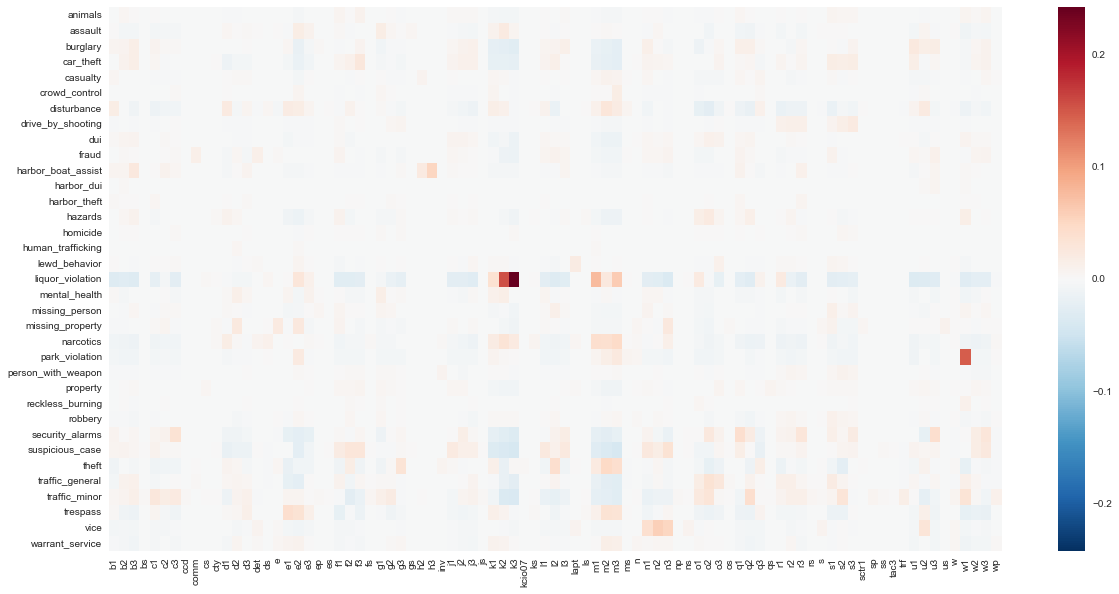

In [124]:
list_1 = df.columns[3:38] # Create a list of the crime columns
list_2 = df.columns[39:-31] # Create a list of the beat columns
plotDict = {} # Create our empty dict for the plot

for crime in list_1:
    for beat in list_2:
        tempDict = {(crime, beat): scipy.stats.pearsonr(df[crime],df[beat])} # Create a temp dict with our 
        # Variables in a tuple as the key and their correlation and p value in a tuple as the value
        plotDict.update(tempDict) # Update our plot dict with the temp
        
dfOutputBt = pd.Series(plotDict).unstack() # Create a data frame from the plot dictionary
dfOutputPearsonBt = dfOutputBt.apply(lambda x: x.apply(lambda x:x[0])) # Grab the correlation
fig, ax = plt.subplots() # Separate fig and axes
fig.set_size_inches(20,10) # Make it big enough to see clearly
sns.heatmap(dfOutputPearsonBt) # Plot it as a heatmap

## Well, it appear that aside from a certain part of town not being able to handle their liquor, we still have fairly weak correlations with location. 
This is very surprising to say the least. When we think of crime or disturbances, we think of "Across the tracks" or the "Bad part of town", and that doesn't seem to hold up in the call data by zone. We see stronger correlations than with the weather, but only roughly twice the effect. These are still pretty weak pearson coefficients. There are a few things to consider of course, one is that the zones may be designed to spread the workload evenly amongst them, meaning that they are designed to have an even distribution of events. The other is that this is only call data, and the "Bad part" of town likely has more incidents which bypass the 911 call system and are directly responded to by a heavier police presence. We don't have the actual crime data here, we are using call data as a proxy, which may lead to some biases. 

The highest correlations appear to be with general suspicious activities such as alarm system calls, trespass, suspicious case and disturbance. The two highest correlations, which appear to be outliers, are liquor in two zones, and park violations in one. This would make sense if the zones with the highest number of liquor violations were around the stadiums for instance.  The park violation zone could contain greenlake or gasworks, a very popular and or sizeable park. We kind of expected to see more strong correlations than these two, maybe it is the zone distribution, let's look at the actual locations.

### We will view some of the events on a map, to try and see if we have any clustering the zone correlation isn't showing. 
Let's start with something we would assume to be correlated highly with a bad part of town, homicide. Then we can look at park violations, liquor violations and general disturbances which show high correlations in the matrix.

In [148]:
homicideDF = df[df.homicide == 1] # Create a DF of just the homicide records
locations = homicideDF[['latitude', 'longitude']] # Grab just the LAT/LONG info 
locationlist = locations.values.tolist() # Save the locations as a list to feed the folium map
len(locationlist) # Check to see how many records there are here anyway

93

In [151]:
map = folium.Map(location=[47.6, -122.34],zoom_start=12) # Define our base map
HeatMap(locationlist).add_to(map) # Overlay our locations as a heatmap over the base
map # Display the resulting map

### We can see a little data leakage here
While we want to see what effect the location has on homicide, even with only 93 records it is apparent that we are getting some leakage from population density. The downtown core is the most likely place we will get a call, but seeing it on the map we are struck by the fact that it is the most densely populated part of the city as well. We don't have the population density data to correct this, but it is something that we should be cognizant of moving forward. 
### With the population density in mind, we still see an area that is predictive of homicides. Rainier Avenue South seems like a pretty sketchy part of town. 
No wonder they top the list of "most affordable" neighborhoods every year. Also my apologies to good ole Aurora Ave North, I was pretty judgemental going into this project, and here you are with your virtue defended by the data. All those seedy motels must not be full of murderers, who knew?

In [153]:
park_violationDF = df[df.park_violation == 1] # Create a DF of just the park violation records
locations = park_violationDF[['latitude', 'longitude']] # Grab just the LAT/LONG info 
locationlist = locations.values.tolist() # Save the locations as a list to feed the folium map
len(locationlist) # Check to see how many records there are here anyway

4465

In [154]:
map = folium.Map(location=[47.6, -122.34],zoom_start=12) # Define our base map
HeatMap(locationlist).add_to(map) # Overlay our locations as a heatmap over the base
map # Display the resulting map

### Surprisingly, we see a number of calls that occur on random blocks and not even at park locations.
Our location data might not be accurate, or we are seeing the location of the caller, not the actual event. Some valuable insight there as well. We have found our hotspot in the city though, and it was not Greenlake or Gasworks. The beaches of West Seattle, congratulations on being the hot spot for park violations!

In [155]:
liquor_violationDF = df[df.liquor_violation == 1]
locations = liquor_violationDF[['latitude', 'longitude']] # Grab just the LAT/LONG info 
locationlist = locations.values.tolist() # Save the locations as a list to feed the folium map
len(locationlist) # Check to see how many records there are here anyway

46224

In [156]:
map = folium.Map(location=[47.6, -122.34],zoom_start=12) # Define our base map
HeatMap(locationlist).add_to(map) # Overlay our locations as a heatmap over the base
map # Display the resulting map

### Our stadium theory doesn't hold water
The distribution of liquor violations is surprisingly even. We also seem to be getting lots of parks as locations, which means these calls aren't for bar patrons, as we had theorized, but most likely people drinking in public. Once again we are mentally crossing Ranier Beach off from the list of places we would consider living.

In [131]:
disturbanceDF = df[df.disturbance == 1]
locations = disturbanceDF[['latitude', 'longitude']] # Grab just the LAT/LONG info 
locationlist = locations.values.tolist() # Save the locations as a list to feed the folium map
len(locationlist) # Check to see how many records there are here anyway

152722

In [157]:
map = folium.Map(location=[47.6, -122.34],zoom_start=12) # Define our base map
HeatMap(locationlist).add_to(map) # Overlay our locations as a heatmap over the base
map # Display the resulting map

### Well, that doesn't provide much information
We can't see the forest for the trees, and our issue with population density is more readily apparent. Just like an episode of Tool Time, more HP didn't really help us here. Let's move on to some other aspects of our data.

## The other potential variable that we haven't looked at is the timing of events. 
Our data is broken down by the exact time of the call, but we really don't need the specific time, we are more interested in the time of day, or the time of the month. Let's do a little more feature engineering and create a time of day column and a day of the month column. Those two should provide the level of detail that we need to properly evaluate correlations.

In [133]:
df['hour'] = df.formatted_time.dt.hour # Create a column with the hour of the day
df['day'] = df.formatted_time.dt.day # Create a column with the day of the month

### Now that we have those features, let's use them to make some plots and take a look at how the time of day or day of the month affect our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c67710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125532240>]], dtype=object)

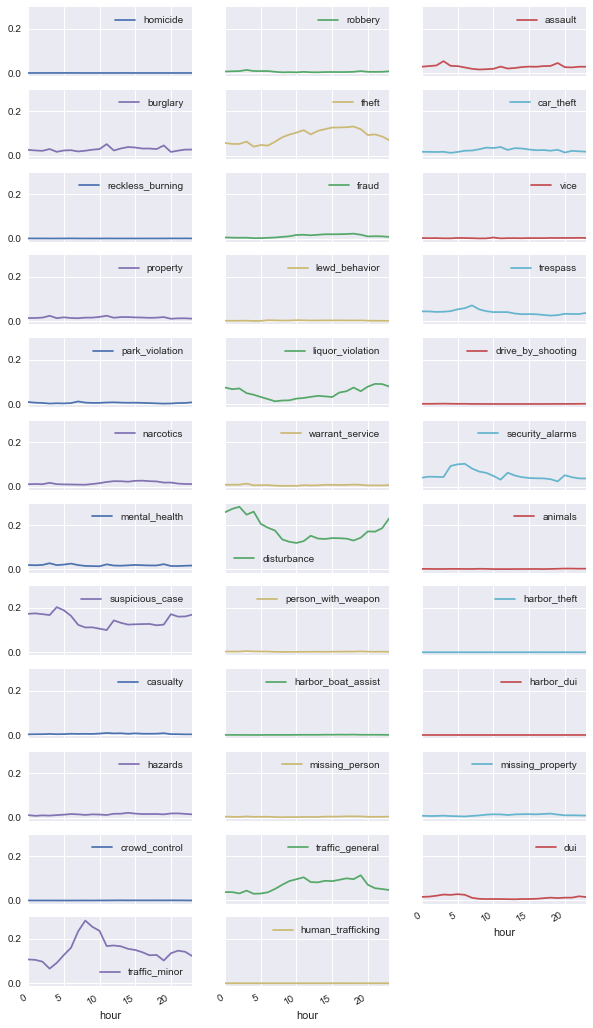

In [134]:
plotlist = df.columns[2:38] # Create a DF of just the columns we care to plot
df.groupby('hour')[plotlist].mean().plot(sharey=True, figsize=(10,20), layout=(12,3), subplots=True) #Display our plots

### We can see some interesting trends here, minor traffic calls definitely peak with the morning commute
Assaults peak at around 2 AM, not after school behind the gymnasium like when we were young. Lunch and dinner seem to be violent as well. DUI does peak in the early morning hours, but is a less pronounced spike than expected. Brunch seems to be a popular time for some trespassing, whereas lunch and dinner are more burglarific. In short, we see some definite patterns, but with very different peak times. Which if we are trying to predict a specific outcome, not just a call, is great news. Our previous supposition that the stadiums may be to blame for the liquor violations doesn't fare well, based on the lack of stadium events at 10pm. Which is why we are exploring our data, to start to form testable hypothesis, not to draw conclusions from charts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125a1e8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13342d320>]], dtype=object)

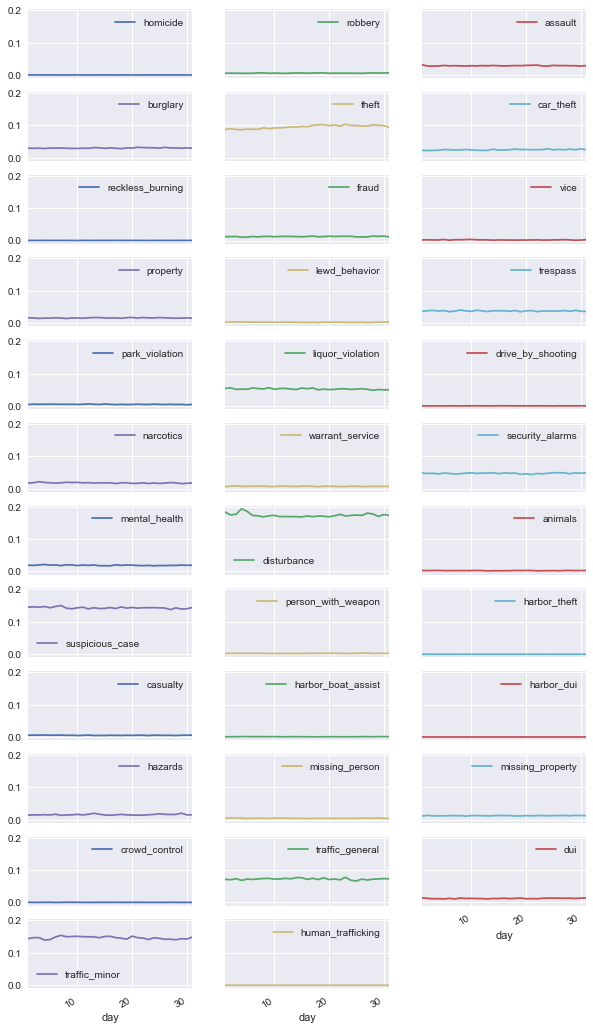

In [135]:
plotlist = df.columns[2:38] # Create a DF of just the columns we care to plot
df.groupby('day')[plotlist].mean().plot(sharey=True, figsize=(10,20), layout=(12,3), subplots=True) #Display our plots

### Well, aside from a slow increase in theft as the month progresses and a spike in disturbances around the end of the first week, we don't see much of a pattern here. 
It's safe to say that we can depend more upon the time of day than day of the month for our insights. We will drop this column. 

In [136]:
df.drop('day', axis=1, inplace=True) # ...Until the end of days...

Let's take a look at which crimes occured the most

In [137]:
totalCalls = df[plotlist].sum().sort_values() # Get the totals for each column and sort by value
totalCalls # Display the totals

human_trafficking          3
harbor_dui                 5
harbor_theft              45
homicide                  93
reckless_burning         157
crowd_control            374
drive_by_shooting        381
harbor_boat_assist       733
vice                    1610
person_with_weapon      2278
animals                 2394
lewd_behavior           2743
missing_person          3945
park_violation          4465
casualty                4657
robbery                 5118
warrant_service         6518
fraud                  10713
missing_property       11015
dui                    11030
hazards                13861
property               14435
narcotics              15903
mental_health          16839
car_theft              21647
assault                25241
burglary               26335
trespass               33340
security_alarms        41753
liquor_violation       46224
traffic_general        63670
theft                  83536
suspicious_case       126012
traffic_minor         128685
disturbance   

## I'm pretty happy to report that human trafficking and homicides are pretty rare, the number of thefts seem a bit high unfortunately.
While it's nice to see the preponderance of calls being for less severe situations, it doesn't help us with predicting those more serious crimes we may be more concerned with. 

# In conclusion, we can see some more feature engineering is in order. 
We will adjust the level of detail for our rain variables to provide some more value.
We don't have much predictive power in the weather, but that isn't too surprising. If every time we had a thunderstorm the number of burglaries jumped, we would have cause to suspect the validity of our data.

### The location of our calls provides some interesting insight.
First, if we were really trying to make a predictive policing model, we would need to adjust for the population density. For our purposes, we will leave well enough alone. Second, our ability to correctly interpret the cause of location correlations is pretty poor. Third, our data doesn't seem to match with where the actual event occured, we don't have that information in our code book either. We must recall here again that we are using call data as a proxy for event data. 

In [138]:
rain_cols = ['drizzle', 'heavy_intensity_rain', 'heavy_intensity_shower_rain', 'light_intensity_drizzle',
            'light_intensity_shower_rain', 'light_rain', 'moderate_rain', 'shower_rain', 'very_heavy_rain'] # List them
rain_df = df[rain_cols] # Create a DF from our column list
df['rain'] = rain_df.max(axis=1) # Find all the rows where our rain columns are True, 1 in this case

In [139]:
df.drop(rain_cols,axis=1,inplace=True) # New Year New You, drop that baggage

## Let's give the snow columns the same treatment

In [140]:
snow_cols = ['light_snow', 'heavy_snow', 'snow'] # List them
snow_df = df[snow_cols] # Create a DF from our column list
df['snow'] = snow_df.max(axis=1)  # Find all the rows where our rain columns are True, 1 in this case

In [141]:
snow_cols.pop() # We want to keep the snow column we just modified, it's the last so we will just pop it off
df.drop(snow_cols,axis=1,inplace=True) # Drop the other cols

In [142]:
print(df.snow.sum()) # Check our work here
print(df.rain.sum())
print(df.columns[-20:])

2714
180936
Index(['pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_today',
       'clouds_all', 'broken_clouds', 'few_clouds', 'fog', 'haze', 'mist',
       'overcast_clouds', 'proximity_thunderstorm', 'scattered_clouds',
       'sky_is_clear', 'smoke', 'snow', 'thunderstorm', 'hour', 'rain'],
      dtype='object')


## Save that to a new pickle file just in case we want the granularity of those columns later

In [143]:
df.to_pickle('Data/modelData.pkl') # We shall call this pickle our modelData, since it's what we will feed our model

## With what we have learned exploring our data, we are ready to move on to building our model!

### Click here -->[Predictive Model](Predictive_Model.ipynb) <--- Click here